In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import microatoll_sim.simulator as sim

2.557255983352661s taken 1
0.20255208015441895s taken 2


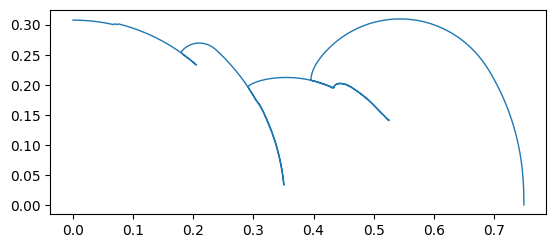

In [2]:
radius = 0.30
d = 1.0
gr = 15
dt = 0.1
Tmax = 30
T0 = 1980
vert_shift = 0.4
num_initial_pts = 200

## post processing
Tmax *= 1.00001
d = d / 1e3
gr = (gr / 1e3) * dt
NT = int(Tmax / dt)

sl_df = pd.read_csv("./data/SeaLevel.csv", header=None, names=["time", "sl"])
sl_arr = sl_df.to_numpy()
sl_arr[:, 1] += vert_shift
band_sl_arr = sim.lowest_discreet(sl_arr, dt, T0, T0 + Tmax)

gr_vec = np.ones(NT) * gr
s = time.time()
lines, living_statuses = sim.coral_growth(
    radius, num_initial_pts, d, gr_vec, NT, band_sl_arr[:, 1]
)
print(f"{time.time()-s}s taken 1")

s = time.time()
lines, living_statuses = sim.coral_growth(
    radius, num_initial_pts, d, gr_vec, NT, band_sl_arr[:, 1]
)
print(f"{time.time()-s}s taken 2")

plt.plot(lines[:, 0], lines[:, 1], lw=1)
plt.gca().set_aspect(1)
plt.show()

## Benchmarks


In [4]:
%timeit sim.lowest_discreet(sl_arr, dt, T0, T0 + Tmax)

76 µs ± 326 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
%timeit sim.resample(lines, living_statuses,d)

18.3 µs ± 60.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
%timeit sim.kill_loop(lines, living_statuses,gr) 

2.07 ms ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit sim.get_pointwise_unit_normals(lines)

3.44 µs ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
